# Comparing Net Worth
This notebook is supposed to help me understand the costs of buying a more expensive house over time. These are going to be really rough estimates cause I'm lazy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Basic Math
Some functions to calculate monthly payments and amortization.

In [2]:
def calculate_monthly_payment(loanAmount, interestRate, loanTermYears):
    monthlyInterest = interestRate/12
    numberOfPayments = loanTermYears*12
    return loanAmount*(monthlyInterest*(1+monthlyInterest)**numberOfPayments)/((1+monthlyInterest)**numberOfPayments-1)

def amortization(loanAmount, interestRate, loanTermYears, loanBalance):
    totalMonthlyPayment = calculate_monthly_payment(loanAmount, interestRate, loanTermYears)
    principal = totalMonthlyPayment-(loanBalance*interestRate/12)
    interest = totalMonthlyPayment - principal
    return interest, principal

## Comparing Monthly Payments
These monthly payments make the following assumptions

In [3]:
INTEREST_RATE = 0.05
LOAN_TERM_YEARS = 30
HOME_INSURANCE = 150
EFFECTIVE_PROPERTY_TAX_RATE = 0.0122

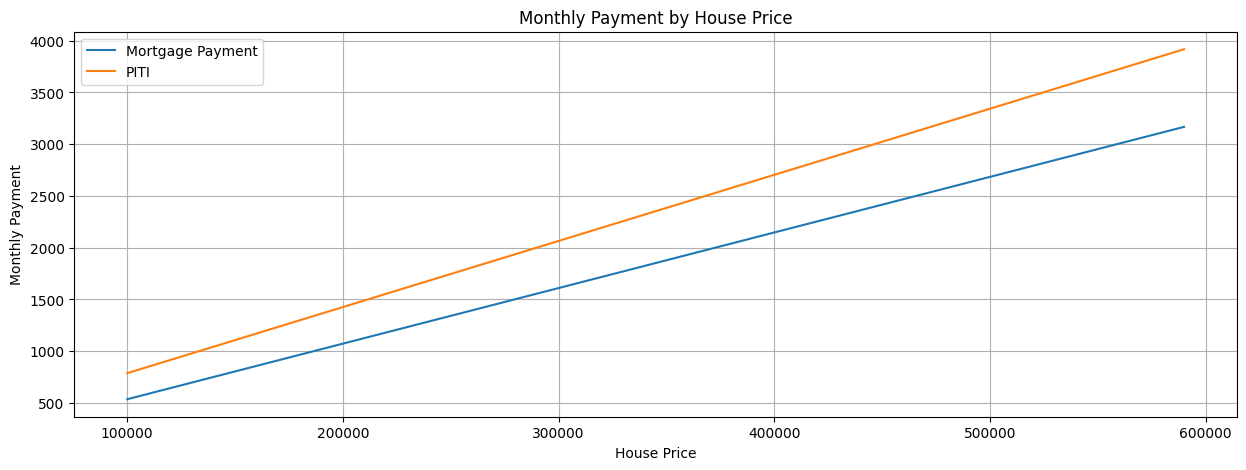

In [4]:
prices = []
payments = []
piti = []
for i in range(100000, 600000, 10000):
    prices.append(i)
    payment = calculate_monthly_payment(i, INTEREST_RATE, LOAN_TERM_YEARS)
    payments.append(payment)
    piti.append(payment+HOME_INSURANCE+i*EFFECTIVE_PROPERTY_TAX_RATE/12)
plt.figure(figsize=(15, 5))
plt.plot(prices, payments)
plt.plot(prices, piti)
plt.title("Monthly Payment by House Price")
plt.xlabel("House Price")
plt.ylabel("Monthly Payment")
plt.legend(["Mortgage Payment", "PITI"])
plt.grid()

## Simulating Some Different Situations
These functions simulate a decision over time.

In [5]:
def simulate_savings_situation(budget, price, rate, term, appreciation, savingsRate, propertyTax, insurance, downPayment):
    payment = calculate_monthly_payment(price, rate, term)
    principal = 0
    interest = 0
    savings = 0
    homeValue = price
    piti = payment + propertyTax*price/12 + insurance
    afterDown = price*(1-downPayment)
    pList = []
    iList = []
    sList = []
    tList = []
    nList = []
    # Loop through every month
    for i in range(term*12):
        if principal > afterDown*0.2:
            piti_pmi = piti
        else:
            piti_pmi = piti + 60
        it, pt = amortization(afterDown, rate, term, afterDown-principal)
        principal = round(principal + pt, 2)
        interest = round(it + interest, 2)
        savings = round(savings*(1+savingsRate/12) + budget - piti_pmi, 2)
        pList.append(principal)
        iList.append(interest)
        sList.append(savings)
        tList.append(principal+interest)
        nList.append(homeValue-(afterDown-principal)+savings)
        homeValue = homeValue*(1+appreciation/12)
    return pList, iList, sList, tList, nList

def simulate_payoff_situation(budget, price, rate, term, appreciation, savingsRate, propertyTax, insurance, downPayment):
    payment = calculate_monthly_payment(price, rate, term)
    principal = 0
    interest = 0
    savings = 0
    homeValue = price
    piti = payment + propertyTax*price/12 + insurance
    afterDown = price *(1-downPayment)
    pList = []
    iList = []
    sList = []
    tList = []
    nList = []
    # Loop through every month
    for i in range(term*12):
        if principal < price:
            it, pt = amortization(afterDown, rate, term, afterDown-principal)
            if principal > afterDown*0.2:
                piti_pmi = piti
            else:
                piti_pmi = piti + 60
            extra = budget - piti_pmi
            pt = pt + extra
            savings = 0
        else:
            it = 0
            pt = 0
            savings = round(savings*(1+savingsRate/12)+budget, 2)
        principal = round(principal + pt, 2)
        interest = round(it + interest, 2)
        
        pList.append(principal)
        iList.append(interest)
        sList.append(savings)
        tList.append(principal+interest) 
        nList.append(homeValue-(afterDown-principal)+savings)
        homeValue = homeValue*(1+appreciation/12)
    return pList, iList, sList, tList, nList

def simulate_rent_situation(budget, price, rent, term, savingsRate, rentIncrease, downPayment):
    payment = rent
    total = 0
    savings = price * downPayment
    sList = []
    tList = []
    # Loop through every month
    for i in range(term*12):
        savings = round(savings*(1+savingsRate/12) + budget - payment, 2)
        payment = payment*(1+rentIncrease/12)
        total = round(total + rent, 2)
        sList.append(savings)
        tList.append(total)
    return sList, tList

## Running the Simulations

In [14]:
budget = 3500
rent = 1600
house = 380000
rate = 0.07
term = 30
appreciation = 0.03
savingsRate = 0.05
rentIncrease = 0.02
downPayment = 0.05
propertyTax = 0.0122
insurance = 150
rSavings, rRent = simulate_rent_situation(budget, house, rent, term, savingsRate, rentIncrease, downPayment)
sPrincipal, sInterest, sSavings, sHousing, sNetWorth = simulate_savings_situation(budget, house, rate, term, appreciation, savingsRate, propertyTax, insurance, downPayment)
pPrincipal, pInterest, pSavings, pHousing, pNetWorth = simulate_payoff_situation(budget, house, rate, term, appreciation, savingsRate, propertyTax, insurance, downPayment)

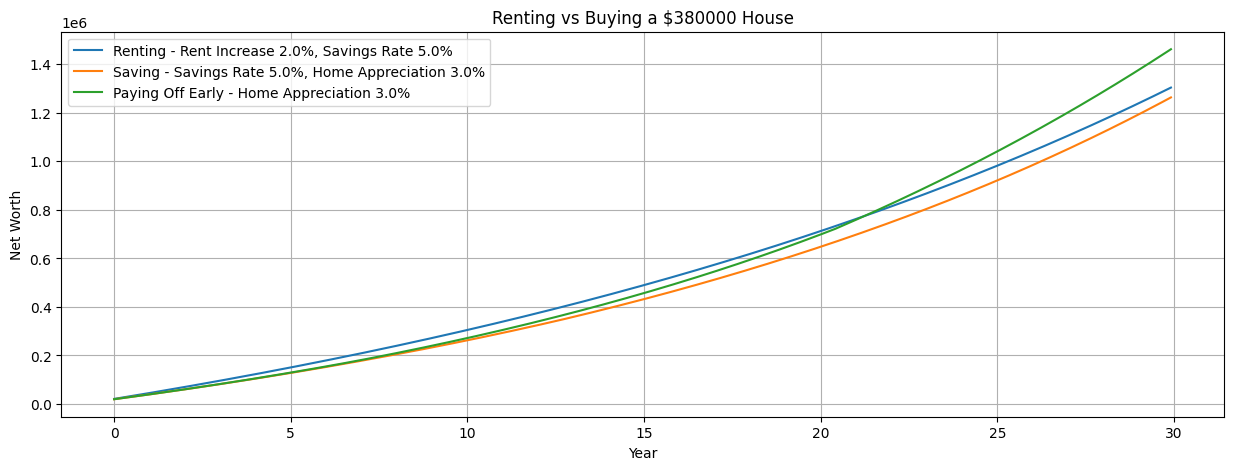

In [15]:
plt.figure(figsize=(15,5))
year = np.arange(0, term, 1/12)
plt.plot(year, rSavings)
plt.plot(year, sNetWorth)
plt.plot(year, pNetWorth)
plt.legend([f"Renting - Rent Increase {rentIncrease*100}%, Savings Rate {savingsRate*100}%", 
            f"Saving - Savings Rate {savingsRate*100}%, Home Appreciation {appreciation*100}%",
            f"Paying Off Early - Home Appreciation {appreciation*100}%"])
plt.title("Renting vs Buying a ${} House".format(house))
plt.xlabel("Year")
plt.ylabel("Net Worth")
plt.grid()

<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jee\AppData\Local\Temp\ipykernel_9628\186044197.py:14: SyntaxWarning: invalid escape sequence '\$'
  a.set_title("Net Worth Over Time - \${} House, \${} Down Payment".format(house, house*downPayment))


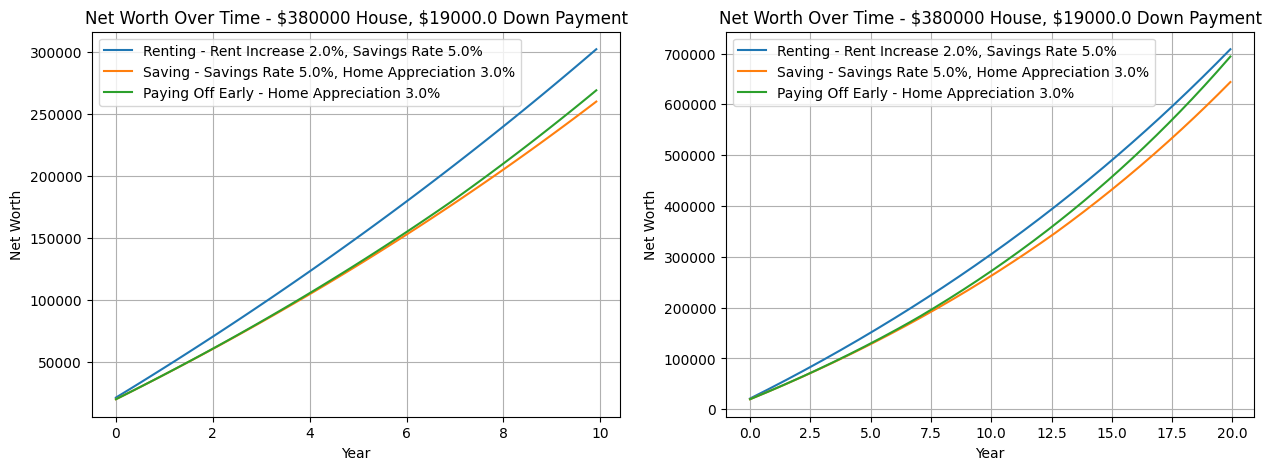

In [16]:
year = np.arange(0, term, 1/12)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(year[:120], rSavings[:120])
ax[0].plot(year[:120], sNetWorth[:120])
ax[0].plot(year[:120], pNetWorth[:120])
ax[1].plot(year[:240], rSavings[:240])
ax[1].plot(year[:240], sNetWorth[:240])
ax[1].plot(year[:240], pNetWorth[:240])
for a in ax:
    a.grid()
    a.set_xlabel("Year")
    a.set_ylabel("Net Worth")
    a.set_title("Net Worth Over Time - \${} House, \${} Down Payment".format(house, house*downPayment))
    a.legend([f"Renting - Rent Increase {rentIncrease*100}%, Savings Rate {savingsRate*100}%", 
            f"Saving - Savings Rate {savingsRate*100}%, Home Appreciation {appreciation*100}%",
            f"Paying Off Early - Home Appreciation {appreciation*100}%"])

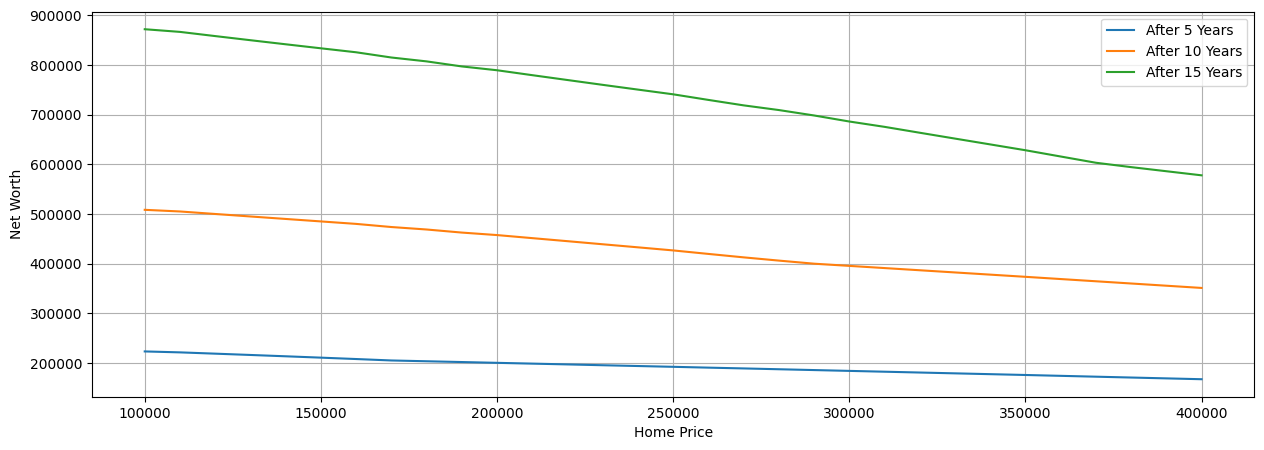

In [9]:
budget = 3500
rent = 1600
rate = 0.05
term = 30
appreciation = 0.03
savingsRate = 0.05
rentIncrease = 0.02
downPayment = 0.05
propertyTax = 0.0122
insurance = 150
netWorth_10 = []
netWorth_15 = []
netWorth_5 = []
netWorth_30 = []
prices = []
for house in range(100000,410000, 10000):
    pPrincipal, pInterest, pSavings, pHousing, pNetWorth = simulate_payoff_situation(budget, house, rate, term, appreciation, savingsRate, propertyTax, insurance, downPayment)
    netWorth_10.append(pNetWorth[10*12])
    netWorth_15.append(pNetWorth[15*12])
    # netWorth_30.append(pNetWorth[30*12-1])
    netWorth_5.append(pNetWorth[5*12])
    prices.append(house)
plt.figure(figsize=(15,5))
plt.plot(prices, netWorth_5)
plt.plot(prices, netWorth_10)
plt.plot(prices, netWorth_15)
# plt.plot(prices, netWorth_30)
plt.legend(["After 5 Years", "After 10 Years", "After 15 Years"])
plt.xlabel("Home Price")
plt.ylabel("Net Worth")
plt.grid()

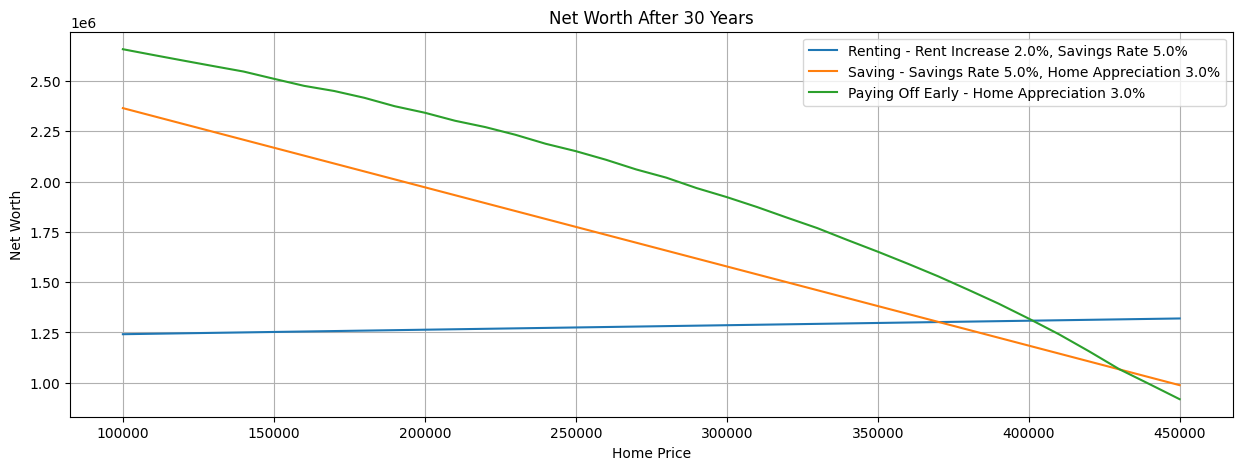

In [18]:
budget = 3500
rent = 1600
rate = 0.07
term = 30
appreciation = 0.03
savingsRate = 0.05
rentIncrease = 0.02
downPayment = 0.05
propertyTax = 0.0122
insurance = 150
year = 30
rNetWorthPoint = []
sNetWorthPoint = []
pNetWorthPoint = []
prices = []
for house in range(100000,460000, 10000):
    rSavings, rRent = simulate_rent_situation(budget, house, rent, term, savingsRate, rentIncrease, downPayment)
    sPrincipal, sInterest, sSavings, sHousing, sNetWorth = simulate_savings_situation(budget, house, rate, term, appreciation, savingsRate, propertyTax, insurance, downPayment)
    pPrincipal, pInterest, pSavings, pHousing, pNetWorth = simulate_payoff_situation(budget, house, rate, term, appreciation, savingsRate, propertyTax, insurance, downPayment)
    rNetWorthPoint.append(rSavings[year*12-1])
    sNetWorthPoint.append(sNetWorth[year*12-1])
    pNetWorthPoint.append(pNetWorth[year*12-1])
    prices.append(house)
plt.figure(figsize=(15,5))
plt.plot(prices, rNetWorthPoint)
plt.plot(prices, sNetWorthPoint)
plt.plot(prices, pNetWorthPoint)
plt.legend([f"Renting - Rent Increase {rentIncrease*100}%, Savings Rate {savingsRate*100}%", 
            f"Saving - Savings Rate {savingsRate*100}%, Home Appreciation {appreciation*100}%",
            f"Paying Off Early - Home Appreciation {appreciation*100}%"])
plt.xlabel("Home Price")
plt.ylabel("Net Worth")
plt.title("Net Worth After {} Years".format(year))
plt.grid()

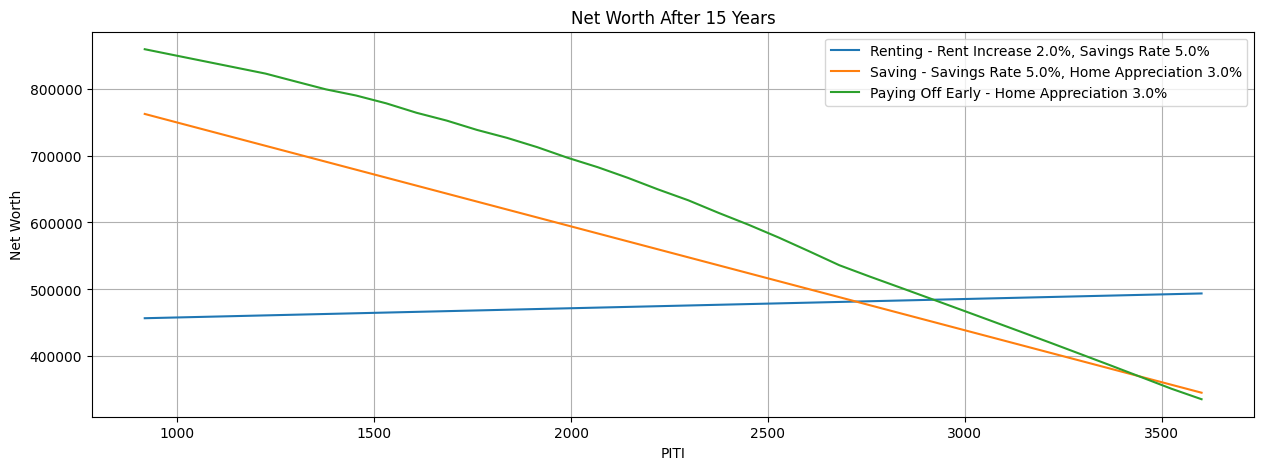

In [11]:
budget = 3500
rent = 1600
rate = 0.07
term = 30
appreciation = 0.03
savingsRate = 0.05
rentIncrease = 0.02
downPayment = 0.05
propertyTax = 0.0122
insurance = 150
year = 15
rNetWorthPoint = []
sNetWorthPoint = []
pNetWorthPoint = []
payments = []
for house in range(100000,460000, 10000):
    rSavings, rRent = simulate_rent_situation(budget, house, rent, term, savingsRate, rentIncrease, downPayment)
    sPrincipal, sInterest, sSavings, sHousing, sNetWorth = simulate_savings_situation(budget, house, rate, term, appreciation, savingsRate, propertyTax, insurance, downPayment)
    pPrincipal, pInterest, pSavings, pHousing, pNetWorth = simulate_payoff_situation(budget, house, rate, term, appreciation, savingsRate, propertyTax, insurance, downPayment)
    rNetWorthPoint.append(rSavings[year*12-1])
    sNetWorthPoint.append(sNetWorth[year*12-1])
    pNetWorthPoint.append(pNetWorth[year*12-1])
    payments.append(calculate_monthly_payment(house, rate, term)+propertyTax/12*house+insurance)
plt.figure(figsize=(15,5))
plt.plot(payments, rNetWorthPoint)
plt.plot(payments, sNetWorthPoint)
plt.plot(payments, pNetWorthPoint)
plt.legend([f"Renting - Rent Increase {rentIncrease*100}%, Savings Rate {savingsRate*100}%", 
            f"Saving - Savings Rate {savingsRate*100}%, Home Appreciation {appreciation*100}%",
            f"Paying Off Early - Home Appreciation {appreciation*100}%"])
plt.xlabel("PITI")
plt.ylabel("Net Worth")
plt.title("Net Worth After {} Years".format(year))
plt.grid()